Clustering

HDBSCAN example:-

In [2]:
%pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


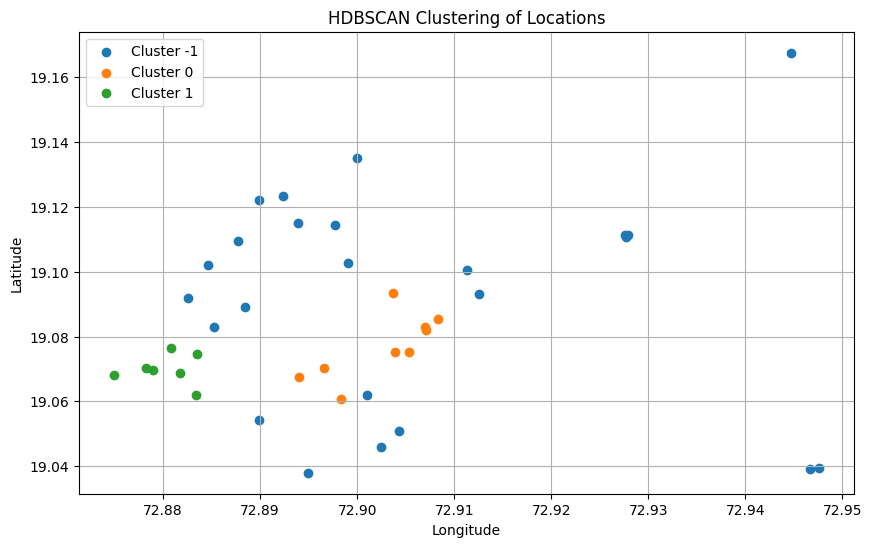

     latitude  longitude  cluster
0   19.050805  72.904268       -1
2   19.111500  72.927931       -1
3   19.093282  72.912599       -1
6   19.045803  72.902443       -1
7   19.102047  72.884625       -1
8   19.062009  72.901012       -1
9   19.039362  72.947580       -1
11  19.054321  72.889909       -1
12  19.091760  72.882590       -1
16  19.039082  72.946626       -1
17  19.114993  72.893858       -1
18  19.083032  72.885218       -1
19  19.100642  72.911316       -1
21  19.111220  72.927603       -1
22  19.121997  72.889838       -1
23  19.135128  72.899975       -1
25  19.102799  72.899071       -1
29  19.123340  72.892360       -1
32  19.109488  72.887683       -1
33  19.037973  72.894934       -1
35  19.114391  72.897668       -1
37  19.088997  72.888488       -1
38  19.167606  72.944666       -1
39  19.110735  72.927662       -1


In [ ]:
import pandas as pd
import numpy as np
import hdbscan
import matplotlib.pyplot as plt

data = [
    (19.0508048, 72.9042676),
    (19.0829897, 72.906953),
    (19.1114996, 72.9279308),
    (19.0932824, 72.912599),
    (19.0701489, 72.8782098),
    (19.0682454, 72.8749835),
    (19.0458033, 72.9024433),
    (19.1020474, 72.8846254),
    (19.0620093, 72.9010123),
    (19.0393616, 72.9475798),
    (19.0819424, 72.9070523),
    (19.0543206, 72.8899094),
    (19.0917599, 72.8825901),
    (19.0745219, 72.883487),
    (19.0752861, 72.9053657),
    (19.0934413, 72.9037215),
    (19.0390818, 72.9466259),
    (19.1149934, 72.8938581),
    (19.0830324, 72.8852184),
    (19.1006423, 72.9113156),
    (19.0854688, 72.9083264),
    (19.11122, 72.9276033),
    (19.1219967, 72.8898383),
    (19.1351276, 72.8999754),
    (19.0674478, 72.8939814),
    (19.1027988, 72.8990711),
    (19.0619076, 72.8834325),
    (19.076335, 72.8808317),
    (19.0688326, 72.8817632),
    (19.1233399, 72.8923599),
    (19.0701866, 72.8965545),
    (19.0608577, 72.8983488),
    (19.1094875, 72.8876827),
    (19.0379731, 72.8949343),
    (19.0752304, 72.9038704),
    (19.1143914, 72.8976678),
    (19.0696378, 72.8790031),
    (19.0889967, 72.8884884),
    (19.1676055, 72.944666),
    (19.110735, 72.9276625)
]

df = pd.DataFrame(data, columns=["latitude", "longitude"])

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df['cluster'] = clusterer.fit_predict(df[['latitude', 'longitude']])

plt.figure(figsize=(10, 6))
for cluster_id in df['cluster'].unique():
    clustered = df[df['cluster'] == cluster_id]
    plt.scatter(clustered['longitude'], clustered['latitude'], label=f'Cluster {cluster_id}')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("HDBSCAN Clustering of Locations")
plt.legend()
plt.grid(True)
plt.show()

print(df[df['cluster'] == -1])  # Cluster -1 means noise


google API, address semantic

In [ ]:
import requests
API_KEY = "API_KEY"  # replace this
def reverse_geocode(lat, lng, api_key):
    url = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat},{lng}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    if data['status'] == 'OK':
        result = data['results'][0]
        return {
            "formatted_address": result['formatted_address'],
            "types": result['types'],
            "address_components": result['address_components']
        }
    else:
        return None

# Example use
info = reverse_geocode(19.0508048, 72.9042676, API_KEY)
print(info)


{'formatted_address': 'Shop No 11, 12, Sion - Trombay Rd, opp. Maitri Park, next to Ajanta Wines Shop, Atur Park, Basant Garden, Chembur, Mumbai, Maharashtra 400071, India', 'types': ['establishment', 'point_of_interest'], 'address_components': [{'long_name': 'Shop No 11', 'short_name': 'Shop No 11', 'types': ['subpremise']}, {'long_name': '12', 'short_name': '12', 'types': ['premise']}, {'long_name': 'Maitri Park', 'short_name': 'Maitri Park', 'types': ['landmark', 'premise']}, {'long_name': 'Ajanta Wines Shop', 'short_name': 'Ajanta Wines Shop', 'types': ['landmark']}, {'long_name': 'Sion - Trombay Road', 'short_name': 'Sion - Trombay Rd', 'types': ['route']}, {'long_name': 'Atur Park', 'short_name': 'Atur Park', 'types': ['neighborhood', 'political']}, {'long_name': 'Basant Garden', 'short_name': 'Basant Garden', 'types': ['political', 'sublocality', 'sublocality_level_2']}, {'long_name': 'Chembur', 'short_name': 'Chembur', 'types': ['political', 'sublocality', 'sublocality_level_1'

HDBSCAN + PCA + t-SNE

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


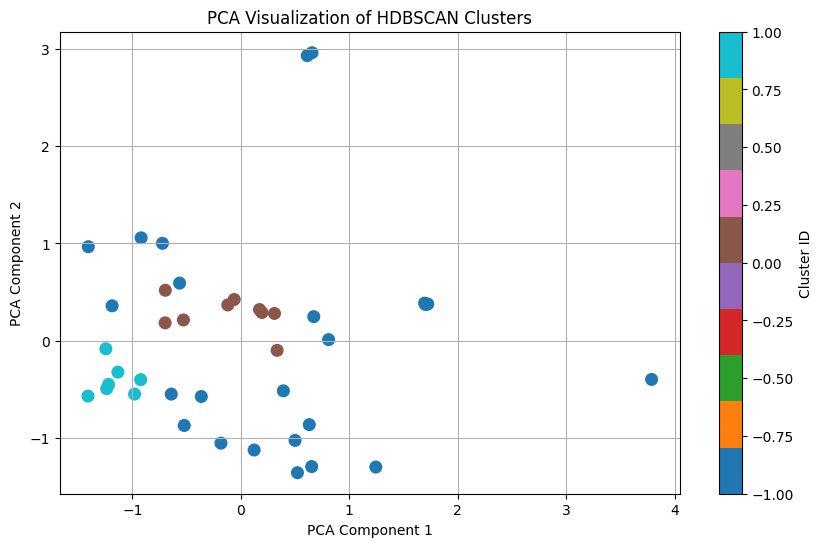

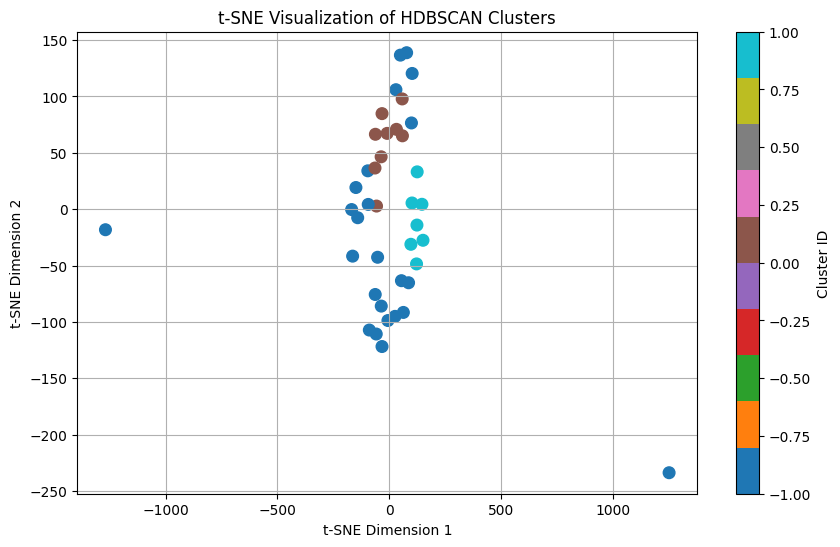

In [ ]:
import pandas as pd
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#we already plummeted data in the code above
df = pd.DataFrame(data, columns=["latitude", "longitude"])

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df['cluster'] = clusterer.fit_predict(df[['latitude', 'longitude']])

# Normalize Data for PCA/t-SNE
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['latitude', 'longitude']])

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='tab10', s=70)
plt.title("PCA Visualization of HDBSCAN Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['cluster'], cmap='tab10', s=70)
plt.title("t-SNE Visualization of HDBSCAN Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster ID")
plt.grid(True)
plt.show()
